# Ensemble Techniques:

**Ensemble methods are techniques that aim at improving the accuracy of results in models by combining multiple models instead of using a single model. The combined models increase the accuracy of the results significantly. This has boosted the popularity of ensemble methods in machine learning.**

We regularly come across many game shows on television and you must have noticed an option of “Audience Poll’. Most of
the times a contestant goes with the option which has the highest vote from the audience and most of the times they win, We
can generalize this in real life as well where taking opinions from a majority of people is much more preferred than theopinion
of a single person. **Ensemble technique has a similar underlying idea where we aggregate predictions from a group of
predictors, which may be classifiers or regressors, and most of the times the prediction is better than the one obtained using a single predictor. Such algorithms are called Ensemble methods and such predictors are called Ensembles.**

Let's suppose we have ‘n’ predictors:

 

ZA, Z2, Z3, Zn with a standard deviation of sigma
Var(z) = sigma^2
If we use single predictors Z1, Z2, Z3, ......., Zn the variance associated with each will be sigma^2 but the expected value will be the average of all the predictors.

Let’s consider the average of the predictors:

ws (Z1 +Z2 +Z3+....... +Zn)/n

 

if we use 'mu' as the predictor then the expected value still remains the same but see the variance now:

Variance(mu) = sigma^2/n

So the expected value remained 'mu' but the variance decreases when we use average of all the predictors.

**This is why taking mean is preferred over using single predictors.**

**Ensemble methods take multiple small models and combine their predictions to obtain a more powerful predictive power.**

***There are few very popular Ensemble Techniques which we will talk in detail such as Bagging , Boosting, Stacking etc.*** 

# Bagging (or Bootstrap Aggregation):

In real life scenarios we don't have multiple different training sets on which we can train our model separately,and at the end combine their result. **Here , Bootstrap comes into the picture , Bootstraping is a technique of sampling different sets of data from a given training set by using replacement. After bootstraping the training dataset ,  we train model on all the different set and aggregate their result. the technique is known as Bootstrap Aggregation or Bagging.**

Let's see the Definition of Bagging :

**Bagging is the type of ensemble technique in which a single training algorithm is used on different subsets of the training data where the subset sampling is done with replacement (bootstrap). Once the algorithm is trained on all the subsets, then
bagging makes the prediction by aggregating all the predictions made by the algorithm on different subsets. In case of
regression, bagging prediction is simply the mean of all the predictions and in the case of classifier, bagging prediction is the most frequent prediction (majority vote) among alll the predictions.**

Bagging is also known as "parallel model" since we run all models parallely and combine there results at the end.

**Advantages of a Bagging Model:**

1) Bagging significantly decreases the variance without increasing bias.

2) Bagging methods work so well because of diversity in the training data since the sampling is done by bootstraping.

3) Also, if the training set is very huge, it can save computional time by training model on relatively smaller data set and still can increase the accuracy of the model.

4) Works well with smalll datasets as well

**“Disadvantage of a Bagging Model:**

The main disadvantage of Bagging is that it improves the accuracy of the model on the expense of interpretability L.e. if a
single tree was being used as the base model, then it would have a more attarctive and easily interpretable diagram, but with
use of bagging this interpretability gets lost.


# Pasting:

**Pasting is a ensemble technique similar to bagging with the only difference being that there is no replacement done while sampling the training dataset.  This cause less diversity(wide variety of something)  in the sampled datasets and data  ends up being correlated(i.e becoz as there is no replacement , so data or features can be same , so it cause correlation).**

"That's why Bagging is more preferred than Pasting in real scenarios".

# Out-of-Bag Evaluation:

**In Bagging , when different samples are collected , no sample contains all the data(becoz every sample is subset of original data) , but Fraction of the original Dataset. So , there might be some data  which are not sampled at all.**

"The remaining data which are not sampled , are called Out-of-Bag Instances."

**Since the model never trained over these data , they can be used for evaluating the accuracy of model  by using these data for prediction. We do not need  validation set or cross-validation and can use out of bag evaluation for that purpose.**

# Bagging Classifier:

In [1]:
# Let's see python implementation of Bagging :

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# sklearn also provide some free datsets : let's select one


from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

X = dataset.data               # .data is features data here.
y = dataset.target             # .target is label here.

In [3]:
from sklearn.model_selection   import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(X,y,random_state = 4)

In [4]:
# Let's initiate KNeighborsClassifier: let's operate knn first , then we'll operate bagging to see the difference :

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train , y_train)      # Passing the training data for training purpose.

knn.score(x_test , y_test)        # Testing the data , and get test_score.

0.8951048951048951

 **So , Here KNN(One model ) is giving 89.5 % accuracy , without using any huperparameter tunung or anything else. KNN itself giving this score.**
 
 So , now we well use/execute BaggingClassifier and we will see what score it will give over KNN.

In [5]:
# In Bagging , we can have any model/algorithm as base model , here we are taking KNeighborsClassifier:

# Instead of KNeighborsClassifier, we can have Decision Tree or any other model too.

bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5),n_estimators = 9 ,max_samples = 0.7 ,
                           bootstrap=True ,random_state =3 ,oob_score = True)

**Here , n_estimator is most important , as it means number of base model , so here no. of KNN will be 9 , which means we want to take predictions/decisions/opinion from 9 model. Here n_estimator can be hundreds or anything**

**max_samples means how much data should go in each model from main dataset. like here how much data should go in 9 models , from main dataset.So 70% of data will be divided in 9 model. Usually , we keep 70-80% .**

**bootstrap = True , means we want to sample data with replacement.**

**random_state can be anything , as we chosen earlier.**

**oob_score Out Of Bag Evaluation score , and oob_score = true means , we want to use this data for evaluation .**


In [6]:
bag_knn.fit(x_train ,y_train)
bag_knn.score(x_test ,y_test)

0.9020979020979021

**Great , our score significantly improves with use of bagging.**

**Here , we used 9 models , so it is better to take opinion of many people instead of only one.**

Let's not use the bootstrap and see the model accuracy. **Remember , this is 'Pasting(Without Replacement)'.**

In [7]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5),n_estimators = 9 ,max_samples = 0.7 ,
                           bootstrap=False ,random_state =3)

In [8]:
pasting_knn.fit(x_train ,y_train)
pasting_knn.score(x_test ,y_test)

0.8881118881118881

**So , our score is decreased , because there can be correlation , and other factors. So , that's why Bagging is more preferred than Pasting.**

When we should use 'Pasting'??

**If we have thousands of features , then we should use bootstrap = False pr Pasting , because let it take 100-200 features in one models without replacement and predict.**

# Random Forests:

**Important Note : Concept is same for all the Bagging Models , There is not too much difference. This algorithm is mainly desgined to removed biasedness and to avoid correlation in models.**

**Decision trees are one of such models which have low bias but high variance. We have studied that decision trees tend to
overfit the data. So bagging technique becomes a very good solution for decreasing the variance in a decision tree. Instead of
using a bagging model with underlying model as a decision tree, we can also use Random forest which is more convenient and well optimized for decision trees. The main issue with bagging is that there is not much independence among the sampled datasets i.e. there is correlation. The advantage of random forests over bagging models is that the random forests makes a tweak in the working algorithm of bagging model to decrease the correlation in trees. The idea is to introduce more randomness while creating trees which will help in reducing correlation.**

Let's understand how algorithm works for a random forest model:

1) Just like in bagging, different samples are collected from the training dataset using bootstraping,

2) On each sample we train our tree model and we allow the trees to grow with high depths.

Now, **the difference with in random forest is how the trees are formed. In bootstraping we allow all the sample data to be used for splitting the nodes but not with random forests. When building a decision tree, each time a split is to happen, a random sample of ‘m’ predictors are chosen from the total ‘p’ predictors. Only those ‘m' predictors are allowed to be used for the split.**

Why is that?

Suppose in those ‘p’ predictors, 1 predictor is very strong. Now each sample this predictor wi11 remain the strongest.So,whenever trees will be built for these sampled data, this predictor will be chosen by all the trees for splitting and thus will result in similar kind of tree formation for each bootstrap model. this introduces correlation in the dataset and averaging correlated dataset do not  lead low variance.**That's why in random forests , the choice for selecting nodes for spliiting is  limited  and it introduces randomness in the formation of trees as well.Most of the predictors are not allowed for split.**

Generally , value of m is taken as m - squareroot(p)  , where p is the number of precitors in the sample.

**When m = p , the random forest model becomes bagging model.**

This method is also referred as Feature Sampling.

**3) Once the trees are formed, prediction is made by the random forest by aggregating the predictions of all the model.For Regression model, the mean of all predictions is the final prediction and for classification model , the mode of all the predictions is considered as the final prediction.**


# Problem Statement:

**To build an application  to classify the patients  to be healty or suffering from cardiovascular disease based on the Given attributes.**

In [9]:
# Important Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing , Normalizing:

from sklearn.preprocessing import StandardScaler

# Models :

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Metrics:

from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
 # Let's import cardio_train dataset from github training ml:
    
df = pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


**Here , cardio is label , and other's are features.

In [11]:
df.shape

(69301, 13)

In [12]:
# Dataset stats:

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Observations:**

1. No missing values
2. Assuming age in number of days
3. Outliers in Height , as 50 % is  165 , 75% is 170 and max is 250 , what is this ?
4. Similarly ,Outliers in Systolic Blood Pressure - ap_hi
5. Outliers in ap_lo
6. Seems cholestrol and gluc are binary , will see in the future analysis.

In [13]:
# How to remove Duplicates:

# drop id and remove duplicates , if any:

df.drop('id',axis = 1, inplace = True)

# Duplicate Removel:

df.drop_duplicates(inplace= True)

In [14]:
df.shape

(69277, 12)

**At first , there were 69301 rows ,and now it have 69277 rows. so duplicates removed. and id column is dropped too.**

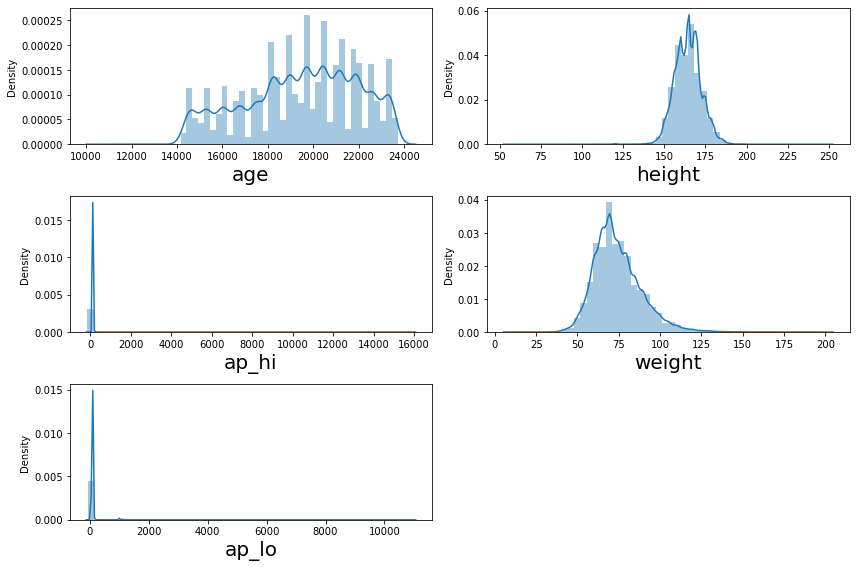

In [15]:
# Let's see the Data distribution to be sure that if there are some outliers in some columns or not??

plt.figure(figsize =(12,8))
plotnumber=1
for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

**Conclusion:**

1. There is some left skewness in age.
2. There is both left and right skewness in height , see the bottom there are many features.
3. There is so much right skewness in ap_hi , and ap_lo.
4. There is some right skewness in weight too.

**Question : How do we know , where are outliers or where is correct data in above plots.**

**Z-Distribution/Statistics:**

Let's transform our normal distribution  into Z-distribution(Standard Normal Distribution) using formula given, where mean = 0 , and std =1.

**Standard deviation = 1 , means -1 to 1 , in graph. Means it wil be able to cover this amount of data i.e -1 to 1., Similarly , standard deviation = 2 , means it will be able to cover this amount of data i.e -2 to 2 , similarly for std =3 , and other left data is count as outliers**

Graph:
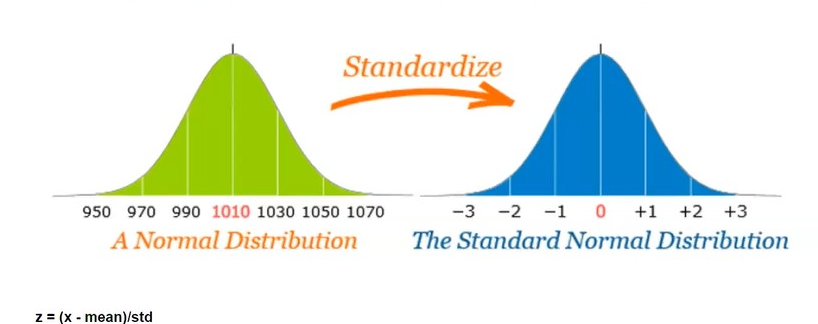

**In terms of numbers , it will cover these amounts of data:**
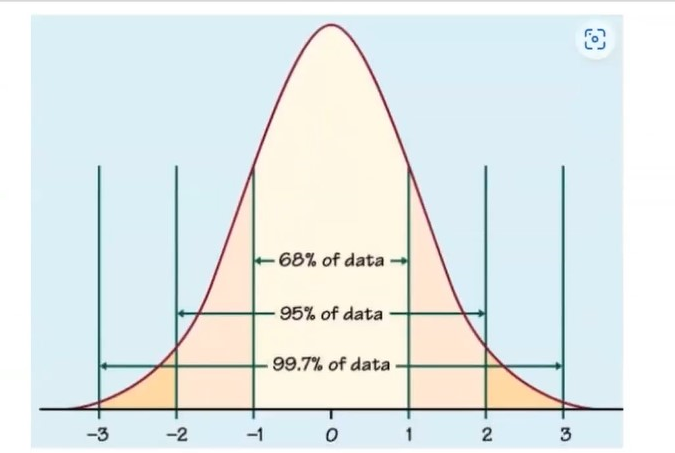

**If std = 1  , it will cover 68% of whole data. It means this 68% data is top-data./Quality data.**

**If std = 2 , it will cover 95% of whole data. If you think std =1 , data covered is less.**

**if std = 3 , it will cover 99.7% of whole data , if you think std =2 , data covered is less.**

So remaiing 0.3 % of data (including both +ve and -ve) will be Outsiders .

**For better results  , std = 3 is assumed almost , because then only 0.3% data will be outliers.**

In [16]:
# with std= 3 , let's see the stats:
# from scipy import stats

# z_score = (x-mean)/std       You have seen this is StandardScaler.

from scipy.stats import zscore

z_score = zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score = np.abs(z_score)   # Apply the formula and get the scaled data.

filtering_entry=(abs_z_score<3).all(axis=1)  

#  Here we want less than 3 std. data. so it will cover all numbers in between -3 to 3.
# .all(axis=1) means we are covering data for all the columns. Then keep it in one variable filtering_entry.
# so remaining data apart from  -3 to 3 , will automatically disappear and sleected will go in df[filtering_entry].



df = df[filtering_entry]

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Conclusion : See the previous describe and now ,max age is same it means there were no outliers , max. height , weight ,ap_lo , ap_hi are changed , it means we removed outliers at some extent.and we covered maximum portion. As we can see in graph , if we take std = 3 , it means it covers 99.7 % of data , and we have left ust 0.3 % of data. So ,there were only 0.3% of outliers , so we didn't lose so much of information.**

In [17]:
df.head()

# This is final dataset with n missing values , no outliers .

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


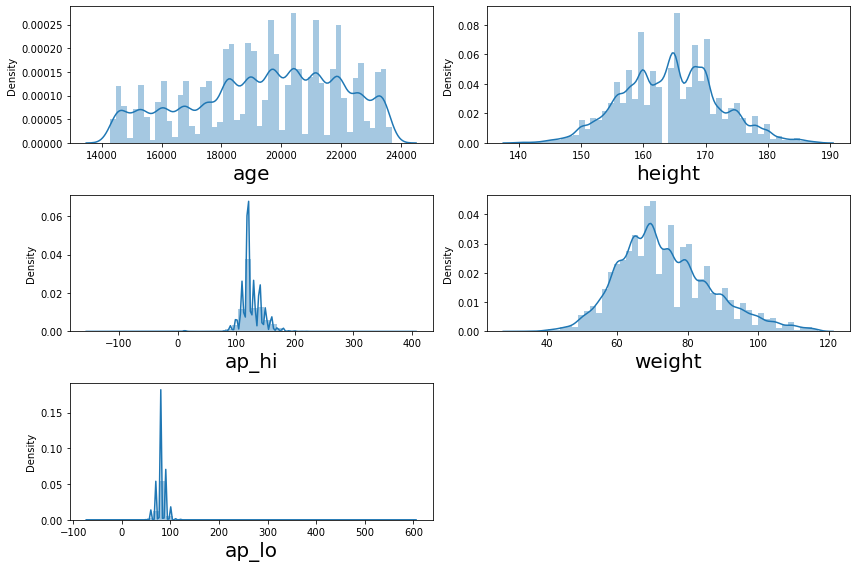

In [18]:
# Check how much skewness is removed to be make sure: 

plt.figure(figsize =(12,8))
plotnumber=1
for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

**So , Comparing with earlier one , this looks better.As we have removed that extended part(outliers)which is approximately zero.**

In [19]:
df.shape

(67360, 12)

**There were 69,277 rows and 12 columns , but now it has 67360 rows and 12 columns . So , Everything is perfect now.**

# Feature Selection :

For this we have to check if there is any multi-collinearity , and we have to find the relationship using strip plot.

**For multi-collinearity:**
 
 We  can use co-relation matrix  and plot heatmap to check to multicolinearity or corelation b/w all variables.(Refer Decision Tree Algorithm for Heatmap)
 
                                            Or
 
 We can use VIF to check  if there is any Multi-colinearity (Refer Logistic Regression)

In [20]:
# let's use all the columns :

X = df.drop(columns = ['cardio'],axis =1)
y= df['cardio']

In [21]:
# Let's split train test data:

x_train , x_test , y_train , y_test = train_test_split(X,y ,test_size=0.30,random_state=41)


# Model Confidence/Accuracy:



In [22]:
# Write one function as call as many times to check accuracy scores of different models:

def metric_score(clf , x_train , x_test , y_train , y_test , train=True):
    if train:
        y_pred = clf.predict(x_train)

        print("\n==============Train Result==========")
        
        print(f"=======accuracy_score:{accuracy_score(y_train , y_pred)*100:.2f}%")
        
    elif train ==False:
        
        pred = clf.predict(x_test)
        
        print("\n===============Test Result===========")
        
        print(f"accuracy_score:{accuracy_score(y_test , pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test ,pred,digits=2)) #Model confindence/accurcy.

In [23]:
# Let's Initiate RandomForestClassifier and train:

random_clf = RandomForestClassifier()  # Shift +tab will give its by default summary used , like estimator , min, sample etc.

# train the model
random_clf.fit(x_train,y_train)

# during running , it will take some time as dataset is big.

RandomForestClassifier()

In [24]:
# let's call the function and pass dataset to check train and test score:

metric_score(random_clf ,x_train , x_test , y_train , y_test , train=True)  # This is for training score.
metric_score(random_clf ,x_train , x_test , y_train , y_test , train=False)  # This is for testing score.



==============Train Result==========
=======accuracy_score:99.98%

===============Test Result===========
accuracy_score:71.17%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     10243
           1       0.71      0.69      0.70      9965

    accuracy                           0.71     20208
   macro avg       0.71      0.71      0.71     20208
weighted avg       0.71      0.71      0.71     20208



**Training score is 99.98% , approx to 100%. and testing score is just 71.40% , there is big gap we feel , so let's tune the parameters to make this gap smaller.**

# Let's tune the parameters using GridSearchCV:

**As we know RandomForest uses estimator , so by default it will use Decision Tree as base estimator:**


In [25]:
# RandomForestClassifier:

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(random_clf ,param_grid=params)
grd.fit(x_train ,y_train)
grd.best_params_          # for best possible parameters, which will give more accuracy , acc. to options we gave above.

# it will take more time during running , as dataset is big ,and
# don't give more values of above options too ,  more the values more will it take time
 

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 13}

In [26]:
random_clf = grd.best_estimator_ # it will cover all the parameters directly , no need to update all one by one.
random_clf.fit(x_train,y_train)      # train model with these new parameters

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=13)

In [27]:
# let's call the function and pass dataset to check train and test score:

metric_score(random_clf ,x_train , x_test , y_train , y_test , train=True)  # This is for training score.
metric_score(random_clf ,x_train , x_test , y_train , y_test , train=False)  # This is for testing score.



==============Train Result==========
=======accuracy_score:74.62%

===============Test Result===========
accuracy_score:73.38%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75     10243
           1       0.76      0.67      0.71      9965

    accuracy                           0.73     20208
   macro avg       0.74      0.73      0.73     20208
weighted avg       0.74      0.73      0.73     20208



**So , now there is no much difference b/w training and testing  score , unlike previous score. So how much it is learning /training score , acc. to that it is giving testing score , so the model we build after hyperparameter tuning is perfect .**

**Note: You can improve the performance  by tweaking preprocessing methods.**

**Do use RandomForestRegressor for Regression algorithms as we did for classifier.**

# Let's plot ROC AUC curve to choose best model:

**As we know for any problem statement , we have to build atleast 3-4 model , one is not enough , so to choose which one is best model which gives more accuracy and seems perfect , we will use ROC AUC curve.**


**So , let's work on same problem statement for all the models or let's build all models just with one problem statement , then we will choose roc suc curve to check which is best model.**

In [28]:
# Plot ROC AUC for multiple models with withput hyperpara,s tuning.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import plot_roc_curve

In [29]:
lr = LogisticRegression()
dt= DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()


In [30]:
# Let's split training amd testing data:

X = df.drop(columns = ['cardio'],axis =1)
y= df['cardio']

x_train,x_test,y_train , y_test = train_test_split(X,y,test_size= 0.25,random_state = 41)


# Training with all classifiers:

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [31]:
# Let's capture all model score or Let's check test score:

lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)

print('All models test score captured')

All models test score captured


# Let's check ROC AUC curve for the best fitted model:

1. True positive rate(TPR) : Out of 100 actual cardio patients , how many our model predicted as cardio patients correctly.(higher the better).

2. False positive rate(FPR): How many patients wrere predicted as cardio , but in reality they were healthy.(Lower the better)

**Since it is difficult to evaluate the score based on only TPR FPR data  , so there comes AUC(Area under the curve).**

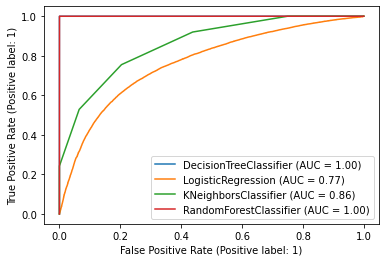

In [32]:
# how well our model working on training data:

disp = plot_roc_curve(dt,x_train,y_train)

plot_roc_curve(lr , x_train,y_train , ax = disp.ax_)   # ax_= axes with confusion matrix
plot_roc_curve(kn , x_train,y_train , ax = disp.ax_) 
plot_roc_curve(rf , x_train,y_train , ax = disp.ax_) 

plt.legend(prop={'size':10},loc = 'lower right')

plt.show()

**Here disp.ax_ will make sure that all these plots will be in one graph , and it will cover all those area with confusion matrix i.e as we knoe for each threshold , confusion matrix will change.**

**Here box at the lower right is legend.**

**For training data : AUC for Decision tree and random forest is 1.00 i.e 100%  and both are overlapped,AUC for logistic regression and kneighbors is 86 and 77% respectively.**


# **How well our model working on test data:**

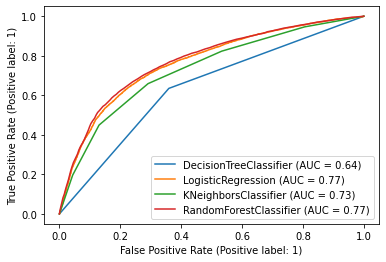

In [33]:
disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr , x_test,y_test , ax = disp.ax_)   # ax_= axes with confusion matrix
plot_roc_curve(kn , x_test,y_test , ax = disp.ax_) 
plot_roc_curve(rf , x_test,y_test , ax = disp.ax_) 

plt.legend(prop={'size':10},loc = 'lower right')

plt.show()

**1.  So based on Training AUC score and  testing AUC score , "Logistic Regression seems perfect , As both the training and testing score is exactly same i.e 77% and in left models there is more gap b/w training and testing score.** 

So LogisticRegression is best among all based on AUC score.